# Classifying fruits using Logistic Regression with a Neural Network.

In [228]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Preparation

In [229]:
# Loading the dataset

fruit_data = pd.read_table("/content/drive/MyDrive/Colab Notebooks/Workspace/Fruit Classifier using KNN/fruit_data_with_colors.txt")


fruit_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [230]:
fruit_data.shape

(59, 7)

In [231]:
# Splitting the dataset into X and y.
# I utilize only two input features

X = fruit_data[["height", "width"]]
y = fruit_data["fruit_label"]


# I set "orange" as the positive class while
# considering all other classes as negative.

y = y == 3
y.name = "orange"

#### Splitting X and y Datasets into Training and Testing Sets

In [232]:
# This function splits the data into training and testing sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

# Data distribution
shapes = {"X": [X.shape, X_train.shape, X_test.shape],
          "y": [y.shape, y_train.shape, y_test.shape],
          "Percent": ["100%", "75%", "25%"]}

pd.DataFrame(shapes, index=["Data", "Train", "Test"])

,X,y,Percent
Data,"(59, 2)","(59,)",100%
Train,"(44, 2)","(44, 1)",75%
Test,"(15, 2)","(15, 1)",25%


In [233]:
# I transpose these datasets so that I can calculate
# their dot product with the weight matrix later.

X_train = X_train.values.T
X_test = X_test.values.T
y_train = y_train.T
y_test = y_test.T

shapes = {"Transpose": [X_train.shape, X_test.shape,
                        y_train.shape, y_test.shape],
          "Original": [X_train.T.shape, X_test.T.shape,
                       y_train.T.shape, y_train.T.shape]}

pd.DataFrame(shapes, index=["X Train", "X Test",
                            "y Train", "y Test"])

,Transpose,Original
X Train,"(2, 44)","(44, 2)"
X Test,"(2, 15)","(15, 2)"
y Train,"(1, 44)","(44, 1)"
y Test,"(1, 15)","(44, 1)"


In [234]:
# This function computes the activations.

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
      z: A scalar or numpy array of any size.

    Return:
      s: sigmoid(z)
    """

    s = 1/(1+np.exp(-z))

    return s



### Parameters initialization

In [235]:
# Initilizing parameters

def initialize_parameters(dim):
    """
      This function creates a vector of zeros of shape (dim, 1) for w
      and initializes b to 0.

      Argument:
        dim: size of the w vector we want (or number of parameters in this case)

      Returns:
        w: initialized vector of shape (dim, 1)
        b: initialized scalar (corresponds to the bias)

      """

    w = np.zeros((dim,1))
    b = 0

    return w, b

### Forward propagation

In [236]:
# Forward propagation

def forward(w, b, X):
    """
    This function computes the prediction.

    Argument:
      X: input data of size (n_x, m)
      w: weight parameter
      b: bias parameter

    Returns:
      a: The sigmoid output.

    """

    z = w.T.dot(X) + b
    a = sigmoid(z)

    return a

### Compute cost

In [237]:
# Compute cost

def compute_cost(a, y):
    """
    Computes the cost function.

    Arguments:
      a: the sigmoid output
      y: "true" labels vector

    Returns:
      cost: cross-entropy cost

    """
    m = a.shape[0]

    loss = np.multiply(y, np.log(a)) + np.multiply((1-y), np.log(1-a))
    cost = -1/m*np.sum(loss)

    return cost

### Backward propagation

In [238]:
# Backward propagation

def backward(a, X, y):
    """
    Computes the gradients.

    Arguments:
      a: the sigmoid output
      X: input data of size (n_x, m)
      y: "true" labels vector

    Returns:
      dw, db: gradients of w and b

    """

    m = X.shape[1]
    dw = 1/m*X.dot((a-y).T)
    db = 1/m*np.sum(a-y)

    return dw, db

### Optimization

In [239]:
# Optimization

def optimization(w, b, X, y, num_iterations, learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm.

    Arguments:
      w: weights parameters
      b: bias parameter
      X: input data
      y: true label
      num_iterations: number of iterations of the loop
      learning_rate: factor for the gradient descent rule

    Returns:
      parameters: dictionary containing the w and b parameters
      grads: dictionary containing the gradients of the parameters
      costs: list of all the cost values each 100 iterations.

    """

    costs = []


    for i in range(num_iterations):

      # Forward propagation

      a = forward(w, b, X)

      # Compute cost

      cost = compute_cost(a, y)

      # Backward propagation

      dw, db = backward(a, X, y)

      # update

      w = w - learning_rate*dw
      b = b - learning_rate*db

      # Save the cost

      if i%100 == 0:
        costs.append(cost)

    parameters = {"w": w,
                  "b": b}

    grads = {"dw": dw,
             "db": db}

    return parameters, grads, costs

### Predictions

In [240]:
def predict(w, b, X):
    """
    Predict whether the labels is 0 or 1 using learned parameters.

    Arguments:
      w: weight parameter
      b: bias parameter
      X: input data

    Returns:
      y_prediction: a numpy array containing all predictions
          for each example.

    """

    a = forward(w, b, X)
    y_prediction = (a > 0.5)

    return y_prediction

# Model

In [241]:
def model(X_train, y_train, x_test, y_test, num_iterations=2000, learning_rate=0.5):
    """
    Builds the logistic regression model by calling the functions previously
    implemented.

    Arguments:
      X_train: training set
      X_test: test set
      y_train: true labels of the training set
      y_test: true labels of the test set
      num_iterations: number of iterations to optimize the parameters
      learning_rate: the factor used in the update rile of gradient descent

    Returns:
      d: dictionary containing information about the model.

    """


    w, b = initialize_parameters(X_train.shape[0])


    # Gradient Descent
    parameters, grads, costs = optimization(w, b, X_train, y_train,
                                            num_iterations, learning_rate)

    w = parameters["w"]
    b = parameters["b"]


    # Predictions

    y_prediction_test = predict(w, b, X_test)*1
    y_prediction_train = predict(w, b, X_train)*1

    # Accuracy

    print("train accuracy: {:.2f} %".format(
        100 - np.mean(np.abs(y_prediction_train - y_train)) * 100
        ))
    print("test accuracy: {:.2f} %".format(
        100 - np.mean(np.abs(y_prediction_test - y_test)) * 100
        ))

    d = {"costs": costs,
         "y_prediction_test": y_prediction_test.flatten(),
         "y_prediction_train" : y_prediction_train.flatten(),
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

### Execution

In [242]:
d = model(X_train, y_train, X_test, y_test, num_iterations=30000, learning_rate=0.0945)


train accuracy: 77.27 %
test accuracy: 53.33 %


### Visualization

In [243]:
import seaborn as sns

<Axes: >

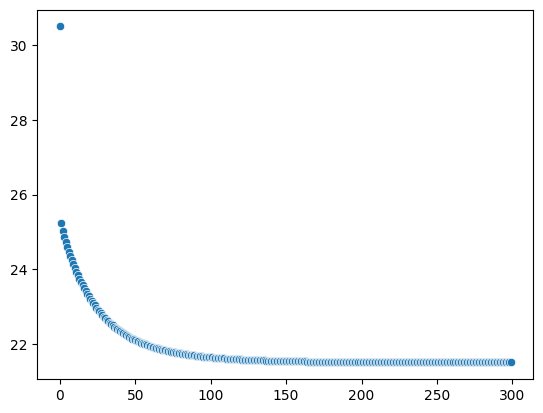

In [244]:
# cost
sns.scatterplot(d["costs"])

<Axes: >

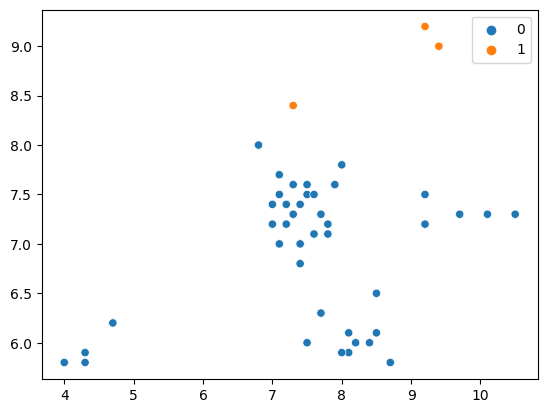

In [245]:
# Train Predictions
sns.scatterplot(x=X_train[0,:], y=X_train[1,:], hue=d['y_prediction_train'])

<Axes: >

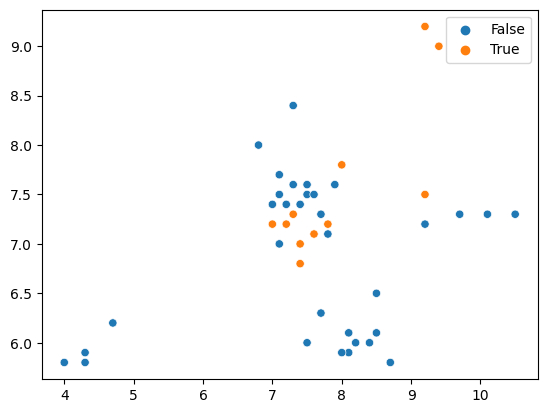

In [246]:
# Real Train
sns.scatterplot(x=X_train[0,:], y=X_train[1,:], hue=y_train.flatten())

<Axes: >

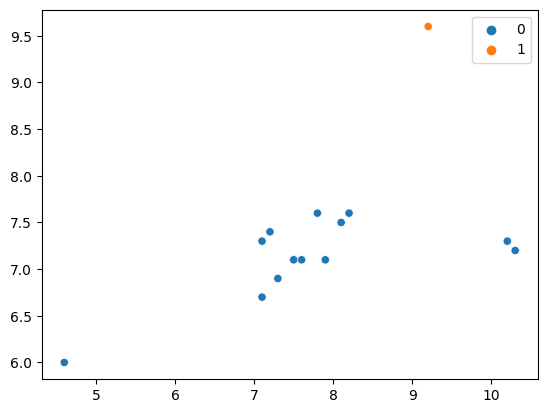

In [247]:
# Test Predictions
sns.scatterplot(x=X_test[0,:], y=X_test[1,:], hue=d['y_prediction_test'])

<Axes: >

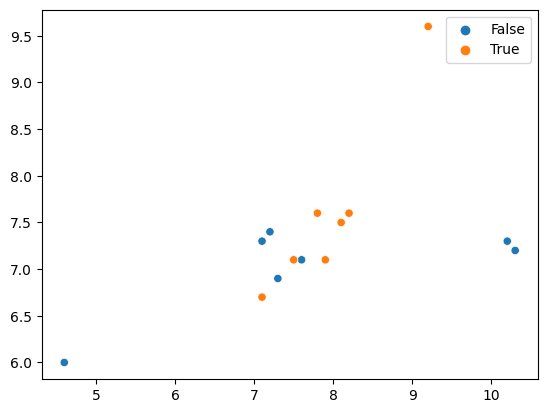

In [248]:
# Real Test
sns.scatterplot(x=X_test[0,:], y=X_test[1,:], hue=y_test.flatten())